In [30]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

Run tensorboard by command:
tensorboard --logdir="./logs"

In [53]:
# 导入SummaryWriter
from torch.utils.tensorboard import SummaryWriter

# 创建SummaryWriter实例，指定log_dir的位置
summaryWriter = SummaryWriter(log_dir="./logs")

In [86]:
x = torch.unsqueeze(torch.linspace(-1, 1, 10000), 1)  # Create a tensor with shape (100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size()) # Create y = x^2 + noisy

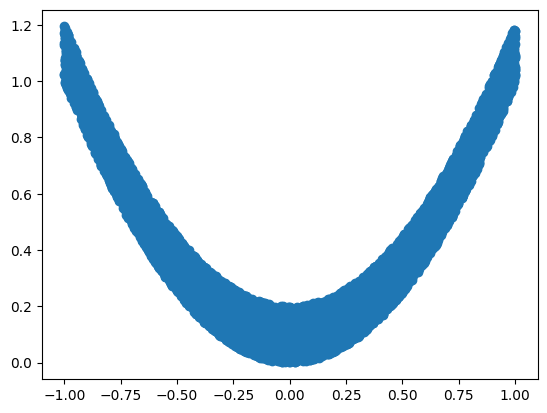

In [87]:
# Visualization
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [88]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output) -> None:
        super(Net, self).__init__()
        # Define Layer modules
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.output = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.output(x)
        return x

In [89]:
net = Net(1, 10, 1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=1, bias=True)
)


In [90]:
# Training
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_function = torch.nn.MSELoss()

losses = []

for epoch in range(200):
    prediction = net(x)
    loss = loss_function(prediction, y)

    optimizer.zero_grad()   # Clean optimizer
    loss.backward()     # Backpropagation
    optimizer.step()    # Update parameters

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/100], Loss: {loss.item()}')

    losses.append(loss.item())
    summaryWriter.add_scalar("loss", loss.item(), epoch)



Epoch [10/100], Loss: 0.09854568541049957
Epoch [20/100], Loss: 0.09103894233703613
Epoch [30/100], Loss: 0.08516545593738556
Epoch [40/100], Loss: 0.07933305948972702
Epoch [50/100], Loss: 0.07277142256498337
Epoch [60/100], Loss: 0.06517210602760315
Epoch [70/100], Loss: 0.05660036578774452
Epoch [80/100], Loss: 0.04754685238003731
Epoch [90/100], Loss: 0.038745004683732986
Epoch [100/100], Loss: 0.03085411712527275
Epoch [110/100], Loss: 0.02429247833788395
Epoch [120/100], Loss: 0.019201183691620827
Epoch [130/100], Loss: 0.015498134307563305
Epoch [140/100], Loss: 0.012953937985002995
Epoch [150/100], Loss: 0.011285223066806793
Epoch [160/100], Loss: 0.010227164253592491
Epoch [170/100], Loss: 0.009567419067025185
Epoch [180/100], Loss: 0.009152187965810299
Epoch [190/100], Loss: 0.008878537453711033
Epoch [200/100], Loss: 0.008682090789079666


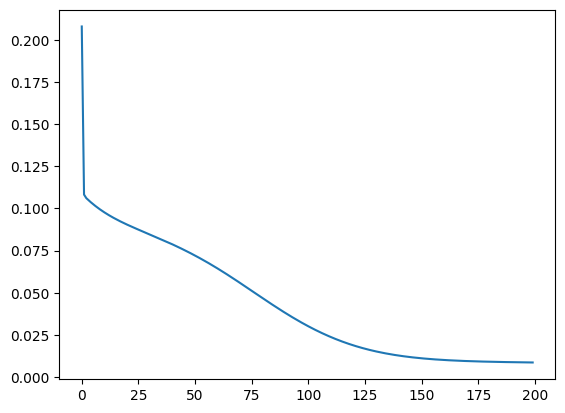

In [91]:
plt.plot(losses)

In [95]:
# Test the model with a single input
with torch.no_grad():
    x_test = torch.tensor([[0.1], [0.5], [1], [0]])
    print(x_test.shape)
    y_pred = net(x_test)
    print(f'Prediction after training: {y_pred}')

torch.Size([4, 1])
Prediction after training: tensor([[ 0.0210],
        [ 0.4267],
        [ 0.9338],
        [-0.0012]])
